In [1]:
import sys
sys.path.append('/home/jhernandez/Work//')
sys.path.append('/home/jhernandez/Work/python_tools/')
from defaults import *

import interpolate_wmop_to_obsfile as iwo

## TS diagrams REP14 Experiment

In [2]:
inn_files = glob(F"/home/modelling/data/workdir_2/Data_assimilation_experiments/REP14/ASSIM/REP14_8gliders_20140609_20140624/*/inn*")
inn_files.sort()
obs_files = glob(F"/home/modelling/data/workdir_2/Data_assimilation_experiments/REP14/ASSIM/REP14_8gliders_20140609_20140624/*/obs*")
obs_files.sort()

In [3]:
df_obs = iwo.merge_all_inn_files(inn_files, obs_files)

In [4]:
simulations = {'G8': '/home/modelling/data/workdir_2/Data_assimilation_experiments/REP14/ROMS/REP14_8gliders_20140609_20140624/',
               'CTDs': '/home/modelling/data/workdir_2/Data_assimilation_experiments/REP14/ROMS/REP14_CTDs_20140609_20140624/',
               'GNR': '/home/modelling/data/workdir_2/Data_assimilation_experiments/REP14/ROMS/REP14_generic_20140609_20140624/'
              }

In [5]:
df_obs = iwo.interpolate_wmop_to_insitu_obs(df_obs, simulations)

Assuming spherical is integer b'T' <class 'numpy.ma.core.MaskedArray'>
Load geographical grid from file


100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


In [6]:
df = df_obs.copy()
k = iwo.get_index_different_obs(df)

In [9]:
df_full = iwo.create_TS_dataframe(df, simulations)

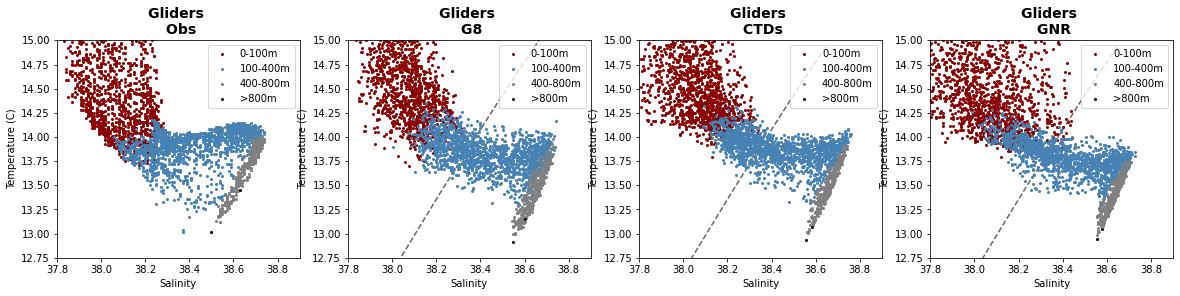

In [10]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

# for j, ks in enumerate(['Obs', 'G8', 'G4']):
for j, ks in enumerate(['Obs', 'G8', 'CTDs', 'GNR']):

    salinity = df_full[F'Salinity {ks}'].values
    temperature = df_full[F'Temperature {ks}'].values
    depth = df_full['depth'].values

    ii = (~np.isnan(salinity)) & (~np.isnan(temperature)) 

    tools.plot_TS_diagram( salinity[ii], temperature[ii], depth[ii], limits = [37.8, 38.9, 12.75, 15.0],
                   title=F"Gliders \n {ks}",
                   ax1=ax[j])